## Part 3: Consuming data using Kafka
In this task, we will implement an Apache Kafka consumer to consume the data from part 2.  

- In this part, use Kafka consumer to consume the streaming data published from task 2.8.
- This part doesn’t require parallel processing, you don’t need to use Spark. 
- Please use pandas or Python functions to do the simple calculations for visualisation.

<IPython.core.display.Javascript object>


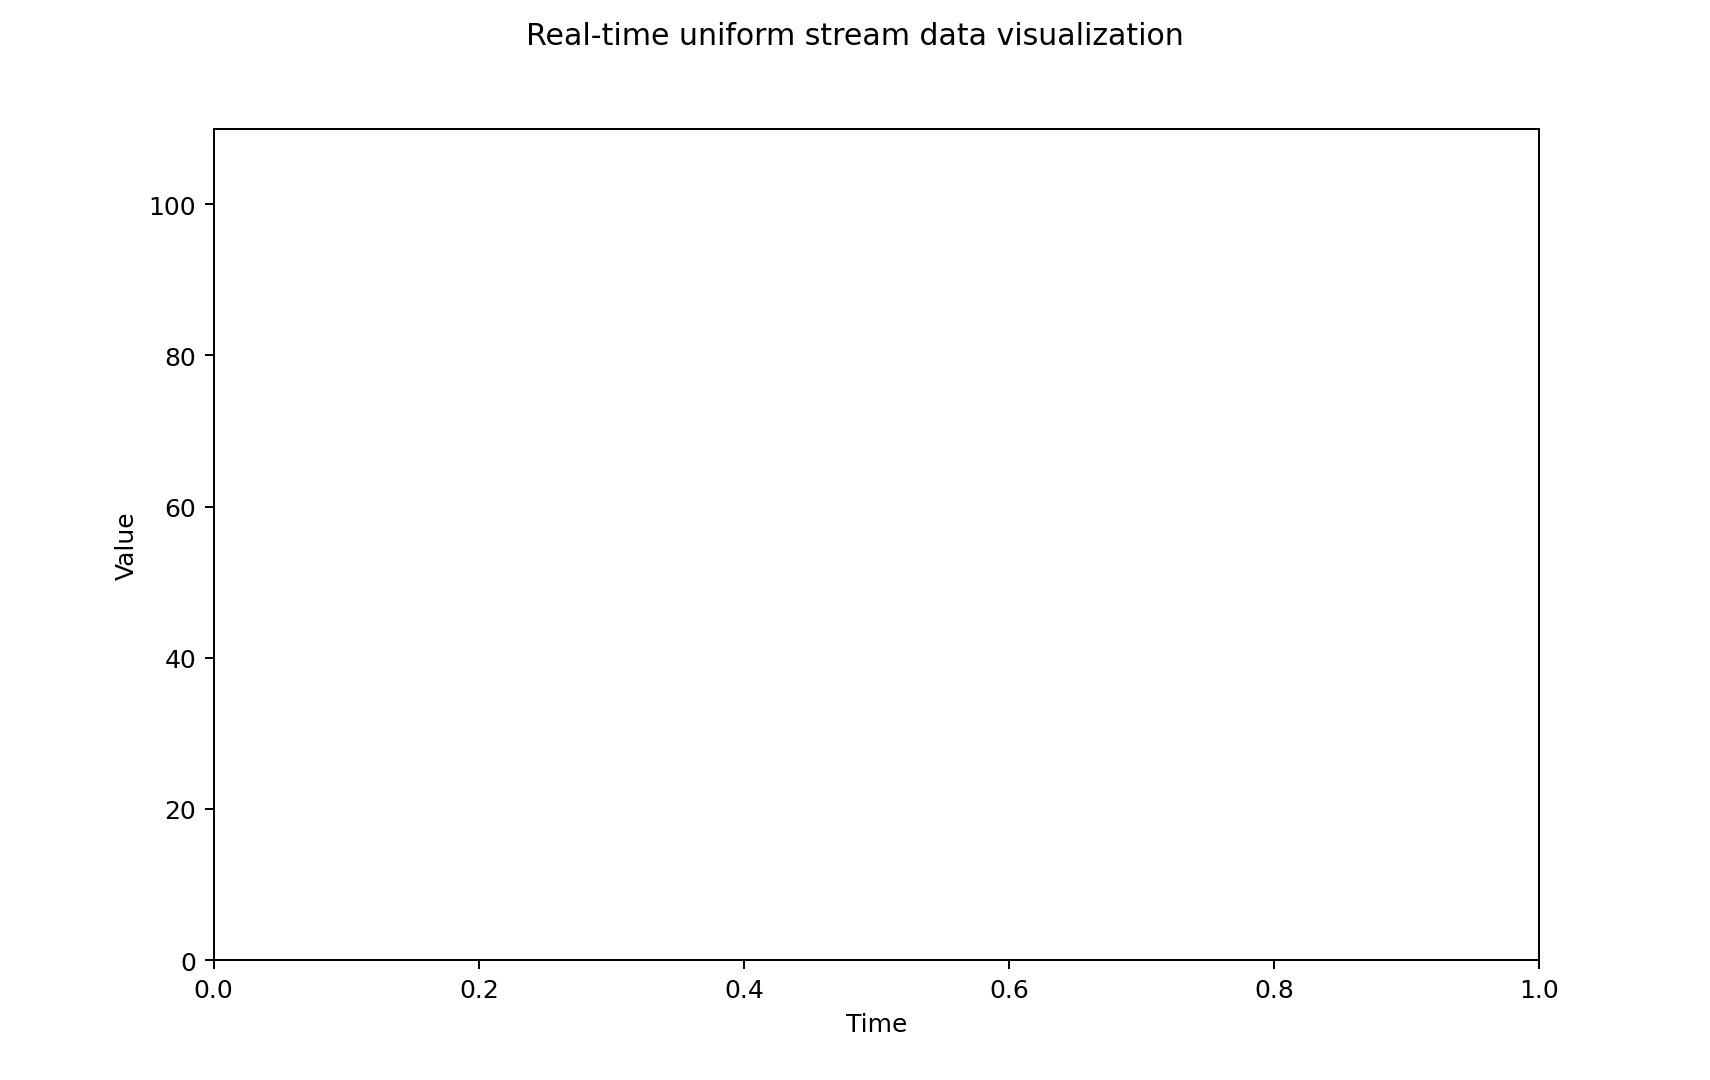

invalid literal for int() with base 10: '"target": "0"'


In [5]:
# Import statements
from kafka3 import KafkaConsumer
import pandas as pd
import matplotlib.pyplot as plt

#configuration
hostip = "kafka"
topic = 'application_data_stream'


def connect_kafka_consumer():
    _consumer = None
    try:
         _consumer = KafkaConsumer(topic,
                                   consumer_timeout_ms=10000, # stop iteration if no message after 10 sec
                                   auto_offset_reset='earliest', # comment this if you don't want to consume earliest available message
                                   bootstrap_servers=[f'{hostip}:9092'],
                                   api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer

def init_plots():
    try:
        width = 9.5
        height = 6
        fig = plt.figure(figsize=(width,height)) # create new figure
        ax = fig.add_subplot(111) # adding the subplot axes to the given grid position
        fig.suptitle('Real-time uniform stream data visualization') # giving figure a title
        ax.set_xlabel('Time')
        ax.set_ylabel('Value')
        ax.set_ylim(0,110) 
        ax.set_yticks([0,20,40,60,80,100])
        fig.show() # displaying the figure
        fig.canvas.draw() # drawing on the canvas
        return fig, ax
    except Exception as ex:
        print(str(ex))
    
def consume_messages(consumer, fig, ax):
    try:
        # container for x and y values
        x, y = [], []
        # print('Waiting for messages')
        for message in consumer:
            data = str(message.value.decode('utf-8')).split(', ')
            x.append(data[0]) 
            y.append(int(data[1]))
            # print(y)
            # we start plotting only when we have 10 data points
            if len(y) > 10:
                ax.clear()
                ax.plot(x, y)
                ax.set_xlabel('Time')
                ax.set_ylabel('Value')
                ax.set_ylim(0,110) 
                ax.set_yticks([0,20,40,60,80,100])
                fig.canvas.draw()
                x.pop(0) # removing the item in the first position
                y.pop(0)
        plt.close('all')
    except Exception as ex:
        print(str(ex))
    
if __name__ == '__main__':
    
    consumer = connect_kafka_consumer()
    fig, ax = init_plots()
    consume_messages(consumer, fig, ax)    
    
    


1. Plot a bar chart showing the number of applications and the number of predicted default applications side-by-side(see the illustration from the specification as an example). For every batch, your diagram will be updated with two additional bars. The x-axis is datetime, y-axis is the number of applications.


2. With streaming data from 7b’s Kafka topic, plot a cumulative line chart and bar chart of required credits, and annotate every 15 seconds with a numerical valued label. Please see the figure from the specification as an example.


Reference

http://127.0.0.1:5202/notebooks/Lab/Lab%209/2.%20Kafka_Consumer01.ipynb - LAB 9